Solution to exercise 1 of Chapter 3 of ThinkStats
Paul Giesting
28 February 2020

In [1]:
import numpy as np
import nsfg
import thinkstats2 as ts2
import thinkplot as tp

Exercise 3.1: the class / family size "paradox."
Use the NSFG respondent variable NUMKDHH to construct
the actual distribution for the number of children
under 18 in the household.
Now compute the biased distribution we would see if we
surveyed the children and asked them how many
children under 18 were in their households.
Plot the actual and biased distributions and compute
their means.

Response data is read in from the nsfg library as a DataFrame
nsfg calls thinkplot2 which calls pandas... ok.

In [2]:
responses = nsfg.ReadFemResp()

The "actual distribution" means from the perspective of
a listing of households. (I don't see why, in this chapter,
this is regarded as somehow ontologically prior to the
distribution as seen from the point of view of the people
in the groups. But I digress.)

In [9]:
pmf_by_house = ts2.Pmf(responses.numkdhh, label='households')
print(pmf_by_house, pmf_by_house.Total())

households 1.0


This tops out at 5? Right. Anyway, plot a histogram.

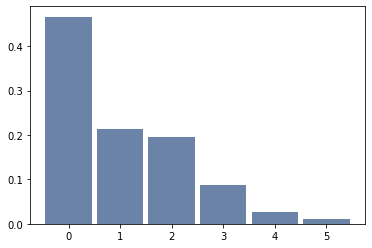

In [10]:
tp.Hist(pmf_by_house)

In [11]:
pmf_by_house.Mean()

1.024205155043831

This is the code from the chapter to "bias" the distribution to reflect the perspective of the members of the groups, rather than the groups themselves. Looked at somewhat differently, this calculates the probability of any individual group member being in a group of size x, starting with the probability of any group being of size x.

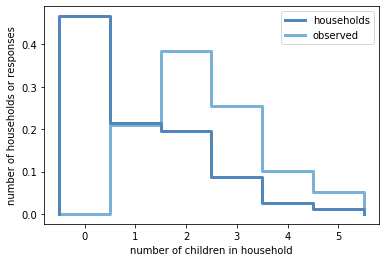

<Figure size 576x432 with 0 Axes>

In [12]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

pmf_by_child = BiasPmf(pmf_by_house, label='observed')
tp.PrePlot(2)
tp.Pmfs([pmf_by_house, pmf_by_child])
tp.Show(xlabel='number of children in household', ylabel='number of households or responses')

In [13]:
pmf_by_child.Mean()

2.403679100664282